In [1]:
%matplotlib inline
import pandas as pd
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import matplotlib.pyplot as plt

In [2]:
# c={1:'come.................................................................................... coming came comes Improving the quality of end-of-life care for hospitalized patients is a priority for healthcare organizations. Studies have shown that physicians tend to over-estimate prognoses, which in combination with treatment inertia results in a mismatch between patients wishes and actual care at the end of life',
#  2:'We describe a method to address this problem using Deep Learning and Electronic Health Record (EHR) data, which is currently being piloted, with Institutional Review Board approval, at an academic medical center. The EHR data of admitted patients are automatically evaluated by an algorithm, which brings patients who are likely to benefit from palliative care services to the attention of the Palliative Care team.',
#  3:'The algorithm is a Deep Neural Network trained on the EHR data from previous years, to predict all-cause 3-12 month mortality of patients as a proxy for patients that could benefit from palliative care. Our predictions enable the Palliative Care team to take a proactive approach in reaching out to such patients,',
#  4:'rather than relying on referrals from treating physicians, or conduct time consuming chart reviews of all patients. We also present a novel interpretation technique which we use to provide explanations of the model\'s predictions.'}

In [3]:
# data=pd.DataFrame.from_dict(c,orient='index')
# data.rename(columns={0:'SentimentText'},inplace=True)

In [4]:
X_train = pd.read_csv('train.csv',encoding = 'ISO-8859-1')
X_test = pd.read_csv('test.csv',encoding = 'ISO-8859-1')

In [5]:
data = X_train[['ItemID','SentimentText']]
target = X_train['Sentiment']
test = X_test[['ItemID','SentimentText']]

In [6]:
# lowercase all data
data['SentimentText']=data['SentimentText'].str.lower()
test['SentimentText']=test['SentimentText'].str.lower()


# remove punctuation
table = str.maketrans('','',string.punctuation)
data['SentimentText'] = data['SentimentText'].apply(lambda x: x.translate(table))
test['SentimentText'] = test['SentimentText'].apply(lambda x: x.translate(table))


# tokenize words
data['SentimentText'] = data['SentimentText'].apply(nltk.word_tokenize)
test['SentimentText'] = test['SentimentText'].apply(nltk.word_tokenize)


# remove stopwords
# stopword = stopwords.words('english')
# for word in ['ain','aren','couldn','didn','doesn','hadn','hasn','haven','isn','mightn','mustn',
#  'needn','shan','shouldn','wasn','weren','wouldn','don','no','nor','not','won']:
#     stopword.remove(word)
# data['SentimentText']=data['SentimentText'].apply(lambda x: [word for word in x if word not in stopword])
# test['SentimentText']=test['SentimentText'].apply(lambda x: [word for word in x if word not in stopword])



/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-

In [20]:
# data

In [8]:
# stemming
ps=PorterStemmer()
data['SentimentText']=data['SentimentText'].apply(lambda x: ' '.join([ps.stem(word) for word in x]))
test['SentimentText']=test['SentimentText'].apply(lambda x: ' '.join([ps.stem(word) for word in x]))

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(min_df=0.0001)

In [10]:
X = tfidf.fit_transform(data['SentimentText']).toarray()

In [11]:
X_test = tfidf.transform(test['SentimentText']).toarray()

In [12]:
X_test.shape

(299989, 6002)

In [13]:
#tfidf.get_feature_names()

In [14]:
y=target.values

In [15]:
# from sklearn.linear_model import LogisticRegression
# clf = LogisticRegression()
# clf.fit(X,y)
# clf.score(X,y)

In [16]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [17]:
# from sklearn.metrics import confusion_matrix
# confusion_matrix(y,clf.predict(X))

In [18]:
predictions = clf.predict(X_test)

In [21]:
pd.concat([test['ItemID'],pd.Series(predictions)],axis=1).set_index('ItemID').rename(columns={0:'Sentiment'}).to_csv('solution_1.csv')

In [18]:
d = pd.concat([test['ItemID'],pd.Series(predictions)],axis=1).set_index('ItemID').rename(columns={0:'Sentiment'})


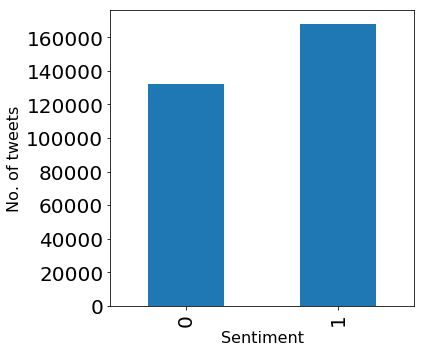

In [49]:
d.groupby('Sentiment').size().plot(kind='bar',figsize=[6,5],fontsize=20)
plt.xlabel('Sentiment',fontsize=16)
plt.ylabel('No. of tweets',fontsize=16)
plt.tight_layout()
plt.savefig('2',c='blue')

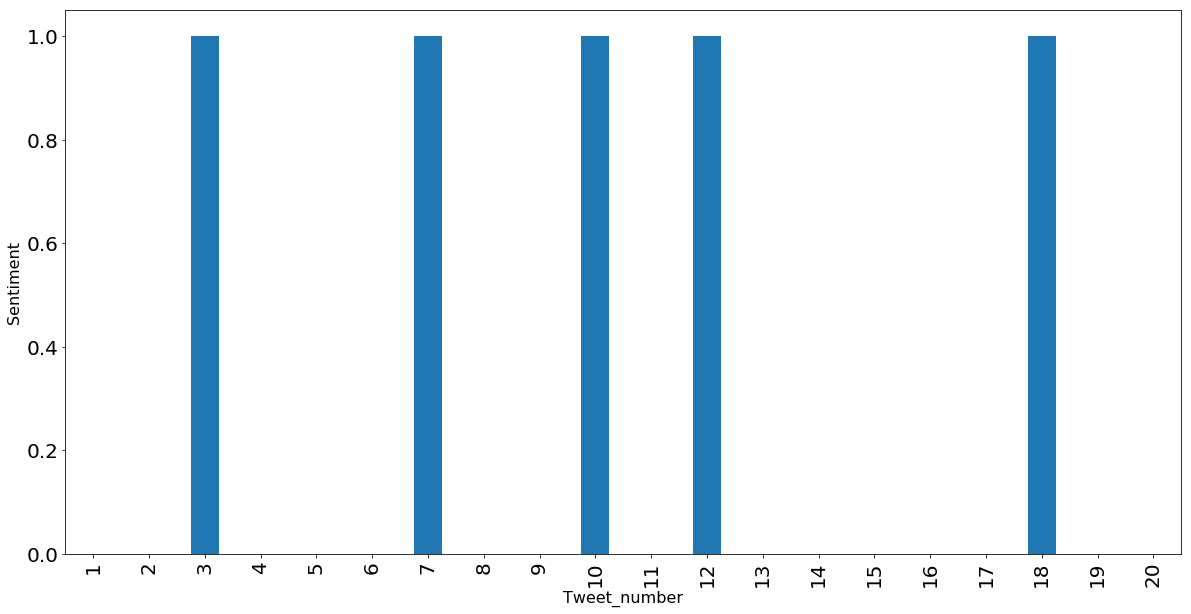

In [43]:
d['Sentiment'].head(20).plot(kind='bar',figsize=[20,10],fontsize=20)
plt.xlabel('Tweet_number',fontsize=16)
plt.ylabel('Sentiment',fontsize=16)
plt.savefig('1')